In [2]:
!conda install -c conda-forge gql -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/matmic/miniconda3/envs/svv-kurs

  added / updated specs:
    - gql


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    gql-2.0.0                  |     pyh9f0ad1d_0          12 KB  conda-forge
    graphql-core-2.3.2         |     pyh9f0ad1d_0          89 KB  conda-forge
    promise-2.3                |  py310hff52083_5          36 KB  conda-forge
    rx-1.6.1                   |             py_0          74 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         211 KB

The following NEW packages will be INSTALLED:

  gql                conda

In [3]:
%%writefile nvdbapi-clientinfo.json
{ "X-Client" : "nvdbapi.py fra Nvdb gjengen, vegdirektoratet", 
 "X-Kontaktperson" : "kenneth.sorensen@vegvesen.no" }

Overwriting nvdbapi-clientinfo.json


In [5]:
## Import script to read data
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.get_data_from_trafikkdata import get_data_from_trafikkdata
from src.data.get_data_from_vegkart import get_data_from_vegkart

In [11]:
df =  get_data_from_vegkart(570,"5055>='2020-01-01' AND 5055<='2020-12-31'")

In [12]:
print(df.columns)

Index(['geometry', 'Geometri, punkt', 'Regulering gangfelt (Ny)',
       'Regulering vegkryss (Ny)', 'UID (Ny)', 'Ukedagstype (Ny)',
       'Ulykkestype (Ny)', 'Ulykkestype underkategori (Ny)', 'År (Ny)',
       'Antall Andre enheter (Ny)', 'Antall Buss (Ny)',
       'Antall Fotgjengere (Ny)', 'Antall Lastebil (Ny)',
       'Antall Lett MC (Ny)', 'Antall MC (Ny)', 'Antall Moped (Ny)',
       'Antall Personbil (Ny)', 'Antall Skinnegående materiell (Ny)',
       'Antall Sykkel (Ny)', 'Antall Traktor (Ny)',
       'Antall Ukjente enheter (Ny)', 'Antall Varebil (Ny)', 'ÅDT (Ny)',
       'ATK, influensstrekning (Ny)', 'Fartsdempende tiltak (Ny)',
       'Vegbelysning (Ny)', 'Historisk Arm (Ny)', 'Historisk Meterverdi (Ny)',
       'Historisk Trafikantgruppe (Ny)', 'Historisk Vegdelstrekning (Ny)',
       'Historisk Vegfase (Ny)', 'Historisk Vegstrekning (Ny)', 'Ukedag',
       'Ulykkesdato', 'Ulykkesklokkeslett', 'Ulykkeskode', 'Antall enheter',
       'Vegtype', 'Stedsforhold', 'Dekketype'

In [65]:
df_1 = df[
    ['Ulykkesdato',
     'Måned (Ny)',
     'Ulykkesklokkeslett',
     'geometry',
     'Ukedagstype (Ny)',
     'Ulykkestype (Ny)',
     'Fylkenavn (Ny)',
     'Fylkenummer (Ny)', 
     'Vegtype', 
     'Stedsforhold',
     'Temperatur',
     'Dekketype', 
     'Føreforhold', 
     'Værforhold',
     'Lysforhold',
     'Fartsgrense',
     'strekning',
     'vegsystem',
     'kortform'
    ]
]

In [66]:
df_1

,Ulykkesdato,Måned (Ny),Ulykkesklokkeslett,geometry,Ukedagstype (Ny),Ulykkestype (Ny),Fylkenavn (Ny),Fylkenummer (Ny),Vegtype,Stedsforhold,Temperatur,Dekketype,Føreforhold,Værforhold,Lysforhold,Fartsgrense,strekning,vegsystem,kortform
0,2020-07-19,7,19:45,POINT Z (544533.382 7568315.821 4.924),Helgedøgn,Fotgjenger/akende,Nordland,18,Annet (plass mm),"Annet (P-plass, torv, o. l.)",NaN,"Asfalt, oljegrus",Ukjent,Ukjent,Dagslys,50.0,"{'id': -1, 'versjon': -1, 'strekning': 155, 'd...","{'id': 1006190596, 'versjon': 1, 'vegkategori'...",EV6 S155D1 m10677
1,2020-06-29,6,19:55,POINT Z (1014115.062 7843588.599 4.654),Yrkesdøgn,Utforkjøring,Troms og Finnmark,54,Vanlig veg/gate,Vegstrekning utenfor kryss/avkjørsel,6.0,"Asfalt, oljegrus","Våt, bar veg","God sikt, nedbør",Dagslys,80.0,"{'id': -1, 'versjon': -1, 'strekning': 10, 'de...","{'id': 1006190010, 'versjon': 1, 'vegkategori'...",EV75 S10D1 m9481
2,2020-07-31,7,17:50,POINT Z (540007.924 7498047.595 13.952),Yrkesdøgn,Motsatt kjøreretning,Nordland,18,Vanlig veg/gate,Vegstrekning utenfor kryss/avkjørsel,17.0,"Asfalt, oljegrus","Tørr, bar veg","God sikt, opphold",Mørkt med vegbelysning,70.0,"{'id': -1, 'versjon': -1, 'strekning': 147, 'd...","{'id': 1006190602, 'versjon': 1, 'vegkategori'...",EV6 S147D1 m5331
3,2020-07-25,7,17:55,POINT Z (95855.987 6930249.666 14.410),Helgedøgn,Motsatt kjøreretning,Møre og Romsdal,15,Vanlig veg/gate,Vegstrekning utenfor kryss/avkjørsel,17.0,"Asfalt, oljegrus","Tørr, bar veg","God sikt, opphold",Dagslys,80.0,"{'id': -1, 'versjon': -1, 'strekning': 8, 'del...","{'id': 1002119961, 'versjon': 1, 'vegkategori'...",FV63 S8D1 m556
4,2020-07-20,7,12:51,POINT Z (-33337.425 6569927.324 49.668),Yrkesdøgn,Samme kjøreretning,Rogaland,11,Motorveg,Tunnel (primært for motorkjøretøy),NaN,"Asfalt, oljegrus","Tørr, bar veg","God sikt, opphold",Dagslys,90.0,"{'id': -1, 'versjon': -1, 'strekning': 100, 'd...","{'id': 1007883992, 'versjon': 1, 'vegkategori'...",EV39 S100D1 m11752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,2020-10-17,10,21:17,POINT Z (274731.099 7040232.000 103.167),Helgedøgn,Fotgjenger/akende,Trøndelag,50,Vanlig veg/gate,4 armet kryss (X-kryss),NaN,"Asfalt, oljegrus","Våt, bar veg","God sikt, nedbør",Mørkt med vegbelysning,50.0,"{'id': -1, 'versjon': -1, 'strekning': 1, 'del...","{'id': 1003315997, 'versjon': 1, 'vegkategori'...",KV8327 S1D1 m475
3530,2020-10-11,10,12:23,POINT Z (261790.947 7027311.614 128.693),Helgedøgn,Utforkjøring,Trøndelag,50,Vanlig veg/gate,Vegstrekning utenfor kryss/avkjørsel,10.0,"Asfalt, oljegrus","Tørr, bar veg","God sikt, opphold",Dagslys,50.0,"{'id': -1, 'versjon': -1, 'strekning': 1, 'del...","{'id': 1014484627, 'versjon': 1, 'vegkategori'...",FV6604 S1D1 m4495
3531,2020-09-11,9,15:40,POINT Z (259233.075 6614798.935 81.879),Yrkesdøgn,Kryssende kjørereretning,Viken,30,Vanlig veg/gate,"3-armet kryss (T-kryss, Y-kryss)",13.0,Ukjent,"Våt, bar veg","God sikt, opphold",Dagslys,50.0,"{'id': -1, 'versjon': -1, 'strekning': 2, 'del...","{'id': 1006188969, 'versjon': 1, 'vegkategori'...",FV1356 S2D1 m5549
3532,2020-09-22,9,14:55,POINT Z (537183.615 7506739.507 140.916),Yrkesdøgn,Samme kjøreretning,Nordland,18,Vanlig veg/gate,Tunnel (primært for motorkjøretøy),6.0,"Asfalt, oljegrus","Våt, bar veg","God sikt, opphold",Ukjent,80.0,"{'id': -1, 'versjon': -1, 'strekning': 147, 'd...","{'id': 1006190602, 'versjon': 1, 'vegkategori'...",EV6 S147D1 m15537


In [62]:
vs = df_1.vegsystem
#d = {"vegkategori": "E"}
#vs = vs[vs.isin(d.values())]
e39 = []

for v in vs:
    if v['vegkategori'] == 'E' and v['nummer'] == 39:
        e39.append(v)
        #print(d)
e39

[{'id': 1007883992,
  'versjon': 1,
  'vegkategori': 'E',
  'fase': 'V',
  'nummer': 39},
 {'id': 1006190211,
  'versjon': 1,
  'vegkategori': 'E',
  'fase': 'V',
  'nummer': 39},
 {'id': 1002200519,
  'versjon': 1,
  'vegkategori': 'E',
  'fase': 'V',
  'nummer': 39},
 {'id': 1006190185,
  'versjon': 1,
  'vegkategori': 'E',
  'fase': 'V',
  'nummer': 39},
 {'id': 1002200897,
  'versjon': 1,
  'vegkategori': 'E',
  'fase': 'V',
  'nummer': 39},
 {'id': 1002200862,
  'versjon': 1,
  'vegkategori': 'E',
  'fase': 'V',
  'nummer': 39},
 {'id': 1006190159,
  'versjon': 1,
  'vegkategori': 'E',
  'fase': 'V',
  'nummer': 39},
 {'id': 1002201790,
  'versjon': 1,
  'vegkategori': 'E',
  'fase': 'V',
  'nummer': 39},
 {'id': 1002202039,
  'versjon': 1,
  'vegkategori': 'E',
  'fase': 'V',
  'nummer': 39},
 {'id': 1002201805,
  'versjon': 1,
  'vegkategori': 'E',
  'fase': 'V',
  'nummer': 39},
 {'id': 1002201707,
  'versjon': 1,
  'vegkategori': 'E',
  'fase': 'V',
  'nummer': 39},
 {'id': 10

In [152]:
ev39 = df_1[df_1.kortform.str.contains("EV39")]

ev39mr = []
f = ["S40D1", "S39D1"]

for s in f: #skal løpe gjenniom alle 
    ev39mr.append(ev39[ev39.kortform.str.contains(s)])
        
ev39mr

#merge frames til ett datasett

[     Ulykkesdato  Måned (Ny) Ulykkesklokkeslett  \
 1337  2020-12-22          12              16:48   
 2166  2020-02-01           2              17:35   
 
                                     geometry Ukedagstype (Ny)  \
 1337  POINT Z (36219.205 6922462.644 44.522)        Yrkesdøgn   
 2166   POINT Z (35559.744 6922295.624 3.587)        Helgedøgn   
 
           Ulykkestype (Ny)   Fylkenavn (Ny)  Fylkenummer (Ny)  \
 1337  Motsatt kjøreretning  Møre og Romsdal                15   
 2166     Fotgjenger/akende  Møre og Romsdal                15   
 
               Vegtype                          Stedsforhold  Temperatur  \
 1337  Vanlig veg/gate  Vegstrekning utenfor kryss/avkjørsel         6.0   
 2166  Vanlig veg/gate  Vegstrekning utenfor kryss/avkjørsel         2.0   
 
              Dekketype   Føreforhold         Værforhold  \
 1337  Asfalt, oljegrus  Våt, bar veg  God sikt, opphold   
 2166  Asfalt, oljegrus  Våt, bar veg   God sikt, nedbør   
 
                   Lysforhold 

In [129]:
df_1

,Ulykkesdato,Måned (Ny),Ulykkesklokkeslett,geometry,Ukedagstype (Ny),Ulykkestype (Ny),Fylkenavn (Ny),Fylkenummer (Ny),Vegtype,Stedsforhold,Temperatur,Dekketype,Føreforhold,Værforhold,Lysforhold,Fartsgrense,strekning,vegsystem,kortform
0,2020-07-19,7,19:45,POINT Z (544533.382 7568315.821 4.924),Helgedøgn,Fotgjenger/akende,Nordland,18,Annet (plass mm),"Annet (P-plass, torv, o. l.)",NaN,"Asfalt, oljegrus",Ukjent,Ukjent,Dagslys,50.0,"{'id': -1, 'versjon': -1, 'strekning': 155, 'd...","{'id': 1006190596, 'versjon': 1, 'vegkategori'...",EV6 S155D1 m10677
1,2020-06-29,6,19:55,POINT Z (1014115.062 7843588.599 4.654),Yrkesdøgn,Utforkjøring,Troms og Finnmark,54,Vanlig veg/gate,Vegstrekning utenfor kryss/avkjørsel,6.0,"Asfalt, oljegrus","Våt, bar veg","God sikt, nedbør",Dagslys,80.0,"{'id': -1, 'versjon': -1, 'strekning': 10, 'de...","{'id': 1006190010, 'versjon': 1, 'vegkategori'...",EV75 S10D1 m9481
2,2020-07-31,7,17:50,POINT Z (540007.924 7498047.595 13.952),Yrkesdøgn,Motsatt kjøreretning,Nordland,18,Vanlig veg/gate,Vegstrekning utenfor kryss/avkjørsel,17.0,"Asfalt, oljegrus","Tørr, bar veg","God sikt, opphold",Mørkt med vegbelysning,70.0,"{'id': -1, 'versjon': -1, 'strekning': 147, 'd...","{'id': 1006190602, 'versjon': 1, 'vegkategori'...",EV6 S147D1 m5331
3,2020-07-25,7,17:55,POINT Z (95855.987 6930249.666 14.410),Helgedøgn,Motsatt kjøreretning,Møre og Romsdal,15,Vanlig veg/gate,Vegstrekning utenfor kryss/avkjørsel,17.0,"Asfalt, oljegrus","Tørr, bar veg","God sikt, opphold",Dagslys,80.0,"{'id': -1, 'versjon': -1, 'strekning': 8, 'del...","{'id': 1002119961, 'versjon': 1, 'vegkategori'...",FV63 S8D1 m556
4,2020-07-20,7,12:51,POINT Z (-33337.425 6569927.324 49.668),Yrkesdøgn,Samme kjøreretning,Rogaland,11,Motorveg,Tunnel (primært for motorkjøretøy),NaN,"Asfalt, oljegrus","Tørr, bar veg","God sikt, opphold",Dagslys,90.0,"{'id': -1, 'versjon': -1, 'strekning': 100, 'd...","{'id': 1007883992, 'versjon': 1, 'vegkategori'...",EV39 S100D1 m11752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,2020-10-17,10,21:17,POINT Z (274731.099 7040232.000 103.167),Helgedøgn,Fotgjenger/akende,Trøndelag,50,Vanlig veg/gate,4 armet kryss (X-kryss),NaN,"Asfalt, oljegrus","Våt, bar veg","God sikt, nedbør",Mørkt med vegbelysning,50.0,"{'id': -1, 'versjon': -1, 'strekning': 1, 'del...","{'id': 1003315997, 'versjon': 1, 'vegkategori'...",KV8327 S1D1 m475
3530,2020-10-11,10,12:23,POINT Z (261790.947 7027311.614 128.693),Helgedøgn,Utforkjøring,Trøndelag,50,Vanlig veg/gate,Vegstrekning utenfor kryss/avkjørsel,10.0,"Asfalt, oljegrus","Tørr, bar veg","God sikt, opphold",Dagslys,50.0,"{'id': -1, 'versjon': -1, 'strekning': 1, 'del...","{'id': 1014484627, 'versjon': 1, 'vegkategori'...",FV6604 S1D1 m4495
3531,2020-09-11,9,15:40,POINT Z (259233.075 6614798.935 81.879),Yrkesdøgn,Kryssende kjørereretning,Viken,30,Vanlig veg/gate,"3-armet kryss (T-kryss, Y-kryss)",13.0,Ukjent,"Våt, bar veg","God sikt, opphold",Dagslys,50.0,"{'id': -1, 'versjon': -1, 'strekning': 2, 'del...","{'id': 1006188969, 'versjon': 1, 'vegkategori'...",FV1356 S2D1 m5549
3532,2020-09-22,9,14:55,POINT Z (537183.615 7506739.507 140.916),Yrkesdøgn,Samme kjøreretning,Nordland,18,Vanlig veg/gate,Tunnel (primært for motorkjøretøy),6.0,"Asfalt, oljegrus","Våt, bar veg","God sikt, opphold",Ukjent,80.0,"{'id': -1, 'versjon': -1, 'strekning': 147, 'd...","{'id': 1006190602, 'versjon': 1, 'vegkategori'...",EV6 S147D1 m15537


In [57]:
df_test

,geometry,Ukedagstype (Ny),Ulykkestype (Ny)
0,POINT Z (544533.382 7568315.821 4.924),Helgedøgn,Fotgjenger/akende
1,POINT Z (1014115.062 7843588.599 4.654),Yrkesdøgn,Utforkjøring
2,POINT Z (540007.924 7498047.595 13.952),Yrkesdøgn,Motsatt kjøreretning
3,POINT Z (95855.987 6930249.666 14.410),Helgedøgn,Motsatt kjøreretning
4,POINT Z (-33337.425 6569927.324 49.668),Yrkesdøgn,Samme kjøreretning
...,...,...,...
3529,POINT Z (274731.099 7040232.000 103.167),Helgedøgn,Fotgjenger/akende
3530,POINT Z (261790.947 7027311.614 128.693),Helgedøgn,Utforkjøring
3531,POINT Z (259233.075 6614798.935 81.879),Yrkesdøgn,Kryssende kjørereretning
3532,POINT Z (537183.615 7506739.507 140.916),Yrkesdøgn,Samme kjøreretning


In [23]:
df_accident_type = df.groupby('Ulykkestype (Ny)').count()

In [24]:
df_accident_type

,geometry,"Geometri, punkt",Regulering gangfelt (Ny),Regulering vegkryss (Ny),UID (Ny),Ukedagstype (Ny),Ulykkestype underkategori (Ny),År (Ny),Antall Andre enheter (Ny),Antall Buss (Ny),...,kommune,fylke,Temperatur,Historisk Kryssdel (Ny),Historisk Kryssdel meterverdi (Ny),kryssystem,Historisk Sideanleggsdel (Ny),Historisk Sideanleggsdel meterverdi (Ny),sideanlegg,sluttdato
Ulykkestype (Ny),,,,,,,,,,,,,,,,,,,,,
Andre ulykker,287,285,287,287,287,287,287,287,287,287,...,287,287,194,18,18,21,0,0,0,0
Fotgjenger/akende,358,358,358,358,358,358,358,358,358,358,...,358,358,268,2,2,6,0,0,0,2
Kryssende kjørereretning,714,714,714,714,714,714,714,714,714,714,...,714,714,549,59,59,76,2,2,2,1
Motsatt kjøreretning,466,466,466,466,466,466,466,466,466,466,...,466,466,372,4,4,5,1,1,1,2
Samme kjøreretning,622,622,622,622,622,622,622,622,622,622,...,622,622,439,37,37,49,1,1,1,0
Utforkjøring,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,...,1087,1087,839,34,34,40,1,1,1,0


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Ulykkestype (Ny)', ylabel='Count'>

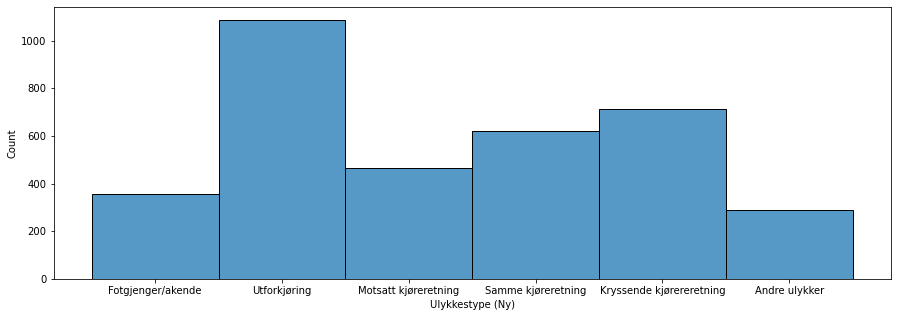

In [32]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df, x='Ulykkestype (Ny)')

<AxesSubplot:xlabel='Fylkenavn (Ny)', ylabel='Count'>

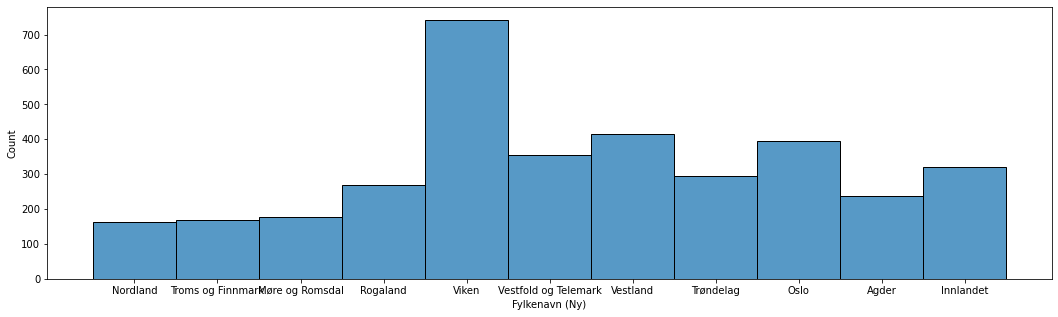

In [37]:
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(data=df, x='Fylkenavn (Ny)')

<AxesSubplot:xlabel='Ukedagstype (Ny)', ylabel='Count'>

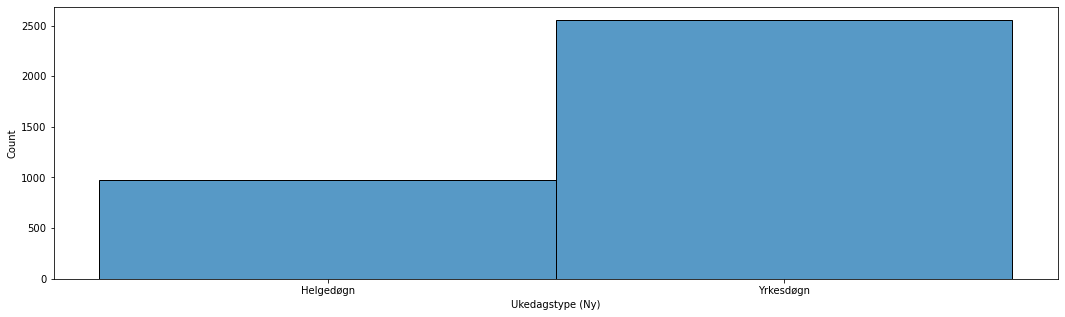

In [38]:
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(data=df, x='Ukedagstype (Ny)')

<AxesSubplot:xlabel='Måned (Ny)', ylabel='Count'>

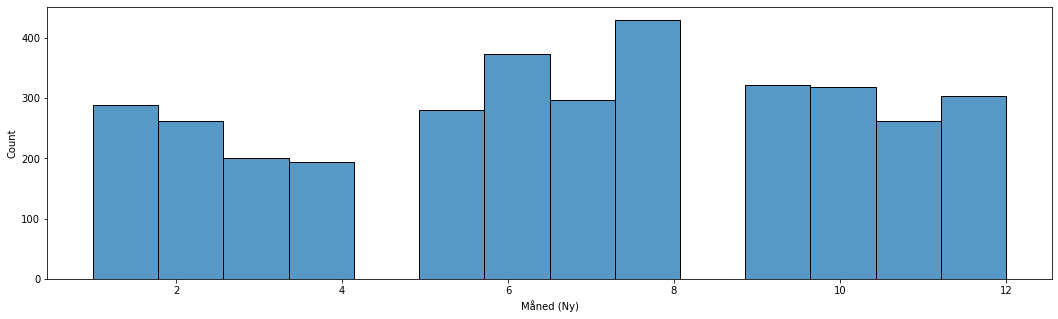

In [63]:
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(data=df_1, x='Måned (Ny)')

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_theme()

# Load the example flights dataset and convert to long-form
#flights_long = sns.load_dataset("flights")
#flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [64]:
df_temp_ant = df_1.groupby('Temperatur').count()

<AxesSubplot:xlabel='Temperatur', ylabel='Count'>

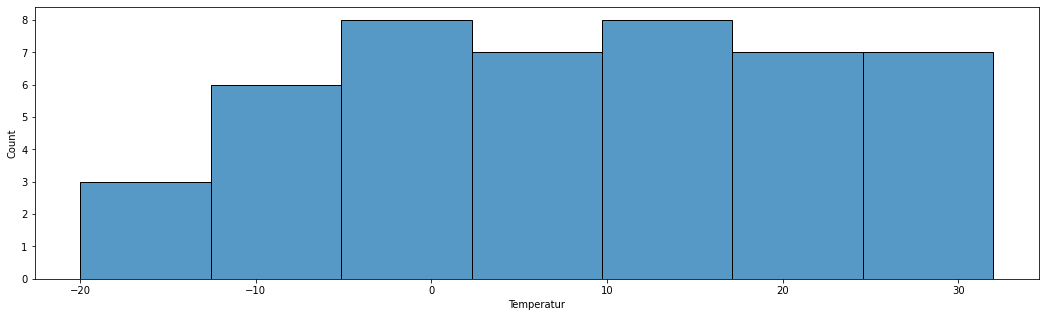

In [65]:
fig, ax = plt.subplots(figsize=(18,5))
sns.histplot(data=df_temp_ant, x='Temperatur')